In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import math as math
import datetime as dt
import json
import requests

r = requests.get('https://data.winnipeg.ca/resource/du7c-8488.json')

trapDF = pd.DataFrame(r.json())
#trapDF.shape

# This part changes 'no data' entries to NaN entries
for cols in list(trapDF.columns):
    for indx in trapDF.index:
        if trapDF.at[indx, cols]=='no data':
            trapDF.at[indx, cols]=np.NaN
# changing coun_date type
trapDF['count_date'] = pd.to_datetime(trapDF['count_date'])            

trapDF=trapDF.sort_values(by=['count_date'])

# changing everything else to date type
for cols in list(trapDF.columns):
    if cols!='count_date':
        trapDF[cols]=pd.to_numeric(trapDF[cols])
        
        
        
# separating data into years
# TrapDF is a dictionary, lookup by year
TrapDF={}
for year in range(2015,2022):
    TrapDF[year]=trapDF[trapDF['count_date'].dt.year==year]
    #TrapDF[year].reset_index(inplace=True,drop=True)
TrapDF[2021].head()

# Replace north_west_i to NWi
replace={}
for ud in ['north','south']:
    for lr in ['west', 'east']:
        for i in range(1,8):
            word=ud+'_'+lr+'_'+str(i)
            replace[word]=ud[0].capitalize()+lr[0].capitalize()+str(i)
            print(word, replace[word])
for let in 'abcdefghi':
    word='rural_'+let+let
    replace[word]=2*let.capitalize()
    print(word, replace[word])

for ud in ['north','south']:
    for lr in ['west', 'east']:
        word=ud+'_'+lr+'_'+'average'
        replace[word]=ud[0].capitalize()+lr[0].capitalize()+'_avg'
        print(word, replace[word])    
    
replace['count_date']='date'
replace['city_wide_daily_average']='city_avg'

for year in range(2015,2022):
    TrapDF[year].rename(columns=replace,inplace=True)
    TrapDF[year].set_index('date',inplace=True)
    
TrapDF[2021].head()

north_west_1 NW1
north_west_2 NW2
north_west_3 NW3
north_west_4 NW4
north_west_5 NW5
north_west_6 NW6
north_west_7 NW7
north_east_1 NE1
north_east_2 NE2
north_east_3 NE3
north_east_4 NE4
north_east_5 NE5
north_east_6 NE6
north_east_7 NE7
south_west_1 SW1
south_west_2 SW2
south_west_3 SW3
south_west_4 SW4
south_west_5 SW5
south_west_6 SW6
south_west_7 SW7
south_east_1 SE1
south_east_2 SE2
south_east_3 SE3
south_east_4 SE4
south_east_5 SE5
south_east_6 SE6
south_east_7 SE7
rural_aa AA
rural_bb BB
rural_cc CC
rural_dd DD
rural_ee EE
rural_ff FF
rural_gg GG
rural_hh HH
rural_ii II
north_west_average NW_avg
north_east_average NE_avg
south_west_average SW_avg
south_east_average SE_avg


C:\Users\andre\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,city_avg,trap_days,NW1,NW2,NW3,NW4,NW5,NW6,NW7,NW_avg,...,SW_avg,AA,BB,CC,DD,EE,FF,GG,HH,II
date,,,,,,,,,,,,,,,,,,,,,
2021-05-03,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-05,0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2021-05-07,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-10,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-12,0,2,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1,...,0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [2]:
col_list=['Date time', 'Maximum Temperature', 'Minimum Temperature', 'Temperature', 'Wind Chill', 'Heat Index', 'Precipitation', 'Wind Speed', 'Wind Direction', 'Wind Gust', 'Cloud Cover', 'Relative Humidity', 'Conditions']
WeathDF={}
for year in range(2015,2022):
    word='WeatherData\history_data_'+str(year)+'.csv'
    WeathDF[year]=pd.read_csv(word, usecols=col_list)
WeathDF[2015].head()

for year in range(2015,2022):
    WeathDF[year]['Date time'] = pd.to_datetime(WeathDF[year]['Date time'])            
    WeathDF[year]=WeathDF[year].sort_values(by=['Date time'])
# changing everything else to date type
for year in range(2015,2022):
    for cols in list(WeathDF[year].columns):
        if cols!='Date time' and cols!='Conditions':
            WeathDF[year][cols]=pd.to_numeric(WeathDF[year][cols])
replace={'Date time':'date', 'Maximum Temperature':'Max_T', 'Minimum Temperature':'Min_T', 'Temperature':'T', 'Relative Humidity':'Humidity'}
for year in range(2015,2022):
    WeathDF[year].rename(columns=replace,inplace=True)
    WeathDF[year].set_index('date',inplace=True)
WeathDF[2016].dtypes    

Max_T             float64
Min_T             float64
T                 float64
Wind Chill        float64
Heat Index        float64
Precipitation     float64
Wind Speed        float64
Wind Direction    float64
Wind Gust         float64
Cloud Cover       float64
Humidity          float64
Conditions         object
dtype: object

In [3]:
#url = 'https://www.energidataservice.dk/proxy/api/datastore_search?resource_id=nordpoolmarket&limit=5'
#response = requests.get(url)
feature_list=['InfoId', 'TrapLabel', 'Area', 'Coordinates_polygon']

LocList=[]
for let in 'ABCDEFGHI':
    LocList.append(let+let)
for let in ['NE','NW','SE','SW']:
    for num in '1234567':
        LocList.append(let+num)
print(LocList)

AreaLocMix=[]
f=json.load(open("JSON/adultMosquitoTrapArea.json"))
#print(f)

for line in f['features']:
    line_list=[]
    line_list.append(line['properties']['trapLocationInfoID'])
    line_list.append(line['properties']['trapLabel'])
    line_list.append(line['properties']['area'])
    line_list.append(line['geometry']['coordinates'])
    AreaLocMix.append(line_list)
#print(AreaLocMix)  
for i in range(len(AreaLocMix)):
    for j in range(len(AreaLocMix)):
        if j>i:
            if AreaLocMix[i][3][0]==AreaLocMix[j][3][0]:
                print(AreaLocMix[i][1],'=',AreaLocMix[j][1])

#print(AreaLocMix[10])
#print(AreaLocMix[11])
    
PolygonDF=[]    
for i in range(len(AreaLocMix)):
    long=[]
    lat=[]
    for point in AreaLocMix[i][3][0]:
        long.append(point[0])
        lat.append(point[1])
    PolygonDF.append(pd.DataFrame(list(zip(long,lat)), columns=['long', 'lat']))
print(PolygonDF[1].head())

AreaLoc={}
for i in range(len(AreaLocMix)):
    AreaLoc[AreaLocMix[i][1]]=AreaLocMix[i][3][0]
print(len(AreaLocMix))
#print(AreaLoc)

['AA', 'BB', 'CC', 'DD', 'EE', 'FF', 'GG', 'HH', 'II', 'NE1', 'NE2', 'NE3', 'NE4', 'NE5', 'NE6', 'NE7', 'NW1', 'NW2', 'NW3', 'NW4', 'NW5', 'NW6', 'NW7', 'SE1', 'SE2', 'SE3', 'SE4', 'SE5', 'SE6', 'SE7', 'SW1', 'SW2', 'SW3', 'SW4', 'SW5', 'SW6', 'SW7']
BB = CC
HH = II
        long        lat
0 -97.040258  50.016223
1 -97.038598  50.019433
2 -97.031871  50.026906
3 -97.108678  50.059985
4 -97.114842  50.063679
37


In [4]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
## point=[x,y], LocIdent returns [loc_1,loc_2,...] list of closest locations to a point
def LocIdent(point):
    [x,y]=point
    pnt=Point(x,y)
    ans={}
    mmin=10 # choose very large
    for loc in LocList:
        coords=[]
        for i in range(len(AreaLoc[loc])):
            coords.append((AreaLoc[loc][i][0], AreaLoc[loc][i][1]))
        #print(coords)
        poly=Polygon(coords)
        if pnt.within(poly):
            mmin=0
            if 0 in ans:
                ans[0].append(loc)
            else:
                ans[0]=[loc]
        if mmin!=0:
            if poly.exterior.distance(pnt)<=mmin:
                mmin=poly.exterior.distance(pnt)
                if mmin in ans:
                    ans[mmin].append(loc)
                else:
                    ans[mmin]=[loc]
    return ans[mmin]
LocIdent([-97.2,49.9])

['NW4']

In [4]:
HelicDF={}
for year in [2020,2021]:
    HelicDF[year]=pd.read_csv('SprayingData/Helic'+str(year)+'.csv')
    HelicDF[year]['date'] = pd.to_datetime(HelicDF[year]['date'])            
    HelicDF[year].set_index('date',inplace=True)

In [6]:
HelicDF[2020].head()

,chemical_h,NE1_h,NE2_h,NE3_h,NE4_h,NE5_h,NE6_h,NE7_h,NW1_h,NW2_h,...,SE5_h,SE6_h,SE7_h,SW1_h,SW2_h,SW3_h,SW4_h,SW5_h,SW6_h,SW7_h
date,,,,,,,,,,,,,,,,,,,,,
2020-04-22,['MT'],0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2020-04-23,['MT'],0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2020-04-24,['MT'],0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2020-04-25,['MT'],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-04-26,['MT'],0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
LocList.append('city_avg')
for let in ['NE','NW','SE','SW']:
    LocList.append(let+"_avg")

TrWtDF={}
for year in range(2015,2022):
    TrWtDF[year]={}
    for loc in LocList:
        TrWtDF[year][loc]=pd.concat([TrapDF[year][loc], WeathDF[year]], axis=1, join="inner")
        
TrWtDF[2016]['NW1']

,NW1,Max_T,Min_T,T,Wind Chill,Heat Index,Precipitation,Wind Speed,Wind Direction,Wind Gust,Cloud Cover,Humidity,Conditions
date,,,,,,,,,,,,,
2016-05-04,1.0,20.7,4.1,12.8,3.4,NaN,0.00,7.6,237.96,31.3,3.4,46.63,Clear
2016-05-06,6.0,24.7,10.9,17.3,NaN,NaN,0.00,25.9,233.21,48.2,5.3,36.61,Clear
2016-05-09,0.0,26.0,11.5,19.2,NaN,NaN,0.24,10.6,155.00,53.7,1.4,29.86,Rain
2016-05-11,4.0,15.3,10.9,12.6,NaN,NaN,1.74,16.2,137.29,53.6,7.5,77.74,Rain
2016-05-13,0.0,3.9,-0.9,1.8,-5.5,NaN,0.74,23.3,327.21,42.1,6.2,65.47,Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-31,27.0,19.9,11.7,16.1,NaN,NaN,0.00,8.3,142.71,27.7,4.4,74.42,Clear
2016-09-02,40.0,26.2,16.9,21.3,NaN,NaN,0.00,16.5,210.08,62.8,5.6,60.32,Clear
2016-09-06,25.0,18.0,12.5,15.7,NaN,NaN,0.00,8.7,256.46,37.1,6.4,72.53,Clear


In [162]:
loc='NW1'
year=2020
TestDF=pd.concat([TrapDF[year][loc], WeathDF[year], HelicDF[year][loc+'_h']], axis=1, join="outer")
        
TestDF.head()
TestDF.describe()
del TestDF['Heat Index'], TestDF['Wind Chill'], TestDF['Wind Direction'], TestDF['Wind Speed']
del TestDF['Wind Gust']

In [16]:
#for indx in TestDF.index:
    #print(indx)
    #if trapDF.at[indx, cols]=='no data':
    #        trapDF.at[indx, cols]=np.NaN


In [163]:
TestDF['Conditions'] = TestDF['Conditions'].map({'Rain' :1, 'Rain, Partially cloudy':1, 'Clear' :0})

length=7
for i in range(length):    
#    TestDF['Max_T_(-'+str(i)+')']=TestDF['Max_T']
#    TestDF['Min_T_(-'+str(i)+')']=TestDF['Min_T']
#    TestDF['T_(-'+str(i)+')']=TestDF['T']
#   TestDF['Precipitation_(-'+str(i)+')']=TestDF['Precipitation']
    for cols in ['Max_T','Min_T','T','Precipitation', 'Cloud Cover', 'Humidity', 'Conditions', loc+'_h']:
        for indx in TestDF.index:
            if indx!=TestDF.index[-(i+1)]:
                TestDF.at[indx+dt.timedelta(days=(i+1)), cols+'_(-'+str(i+1)+')']=TestDF.at[indx, cols]
                
for i in range(length):                  
    TestDF[loc+'_h'+'_(-'+str(i+1)+')']=TestDF[loc+'_h'+'_(-'+str(i+1)+')'].fillna(0)
TestDF.head(20)

,NW1,Max_T,Min_T,T,Precipitation,Cloud Cover,Humidity,Conditions,NW1_h,Max_T_(-1),...,Conditions_(-6),NW1_h_(-6),Max_T_(-7),Min_T_(-7),T_(-7),Precipitation_(-7),Cloud Cover_(-7),Humidity_(-7),Conditions_(-7),NW1_h_(-7)
date,,,,,,,,,,,,,,,,,,,,,
2020-04-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-04-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-04-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-04-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-04-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


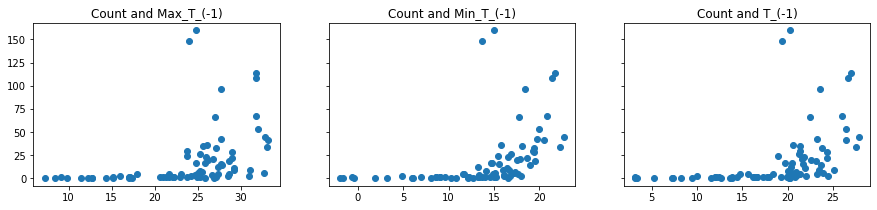

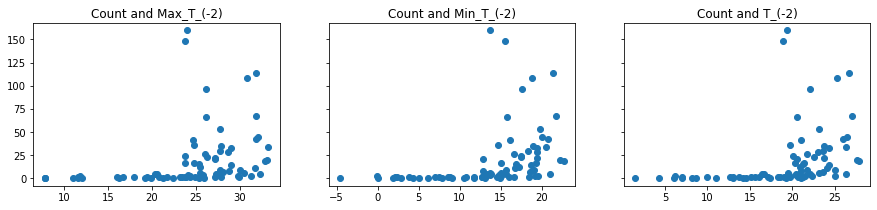

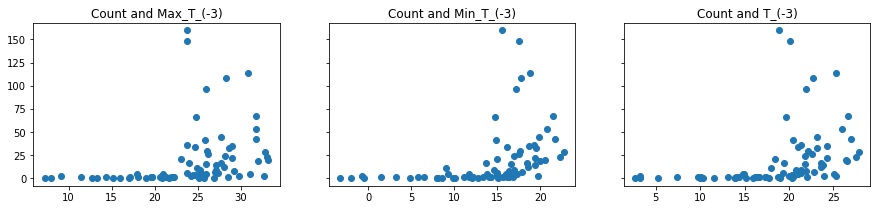

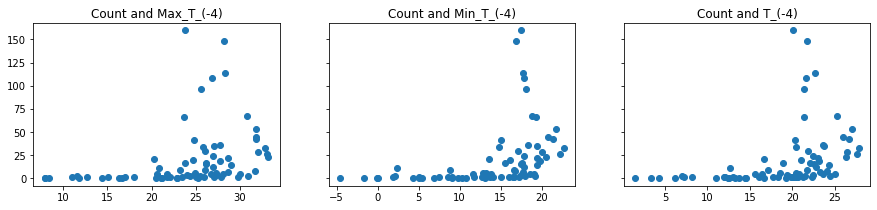

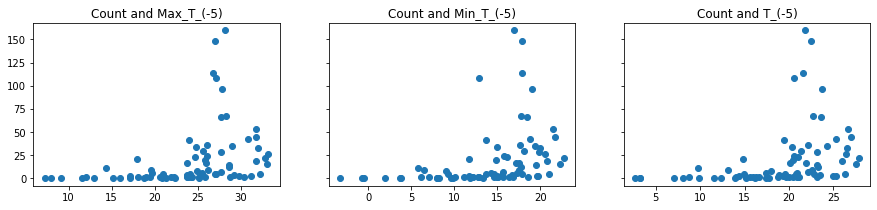

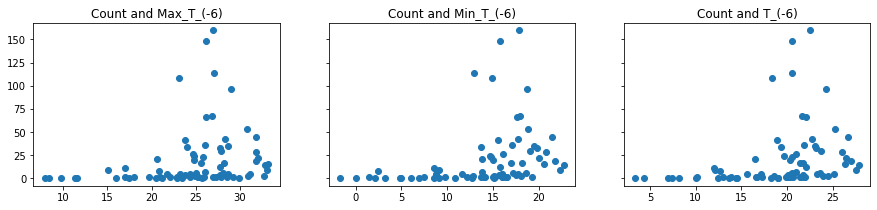

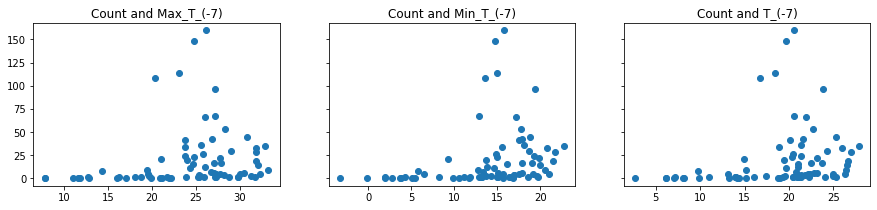

In [152]:
#checking normality
for i in range(length):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
    ax1.scatter(TestDF['Max_T'+'_(-'+str(i+1)+')'],TestDF[loc])
    ax1.set_title('Count and Max_T'+'_(-'+str(i+1)+')')
    ax2.scatter(TestDF['Min_T'+'_(-'+str(i+1)+')'],TestDF[loc])
    ax2.set_title('Count and Min_T'+'_(-'+str(i+1)+')')
    ax3.scatter(TestDF['T'+'_(-'+str(i+1)+')'],TestDF[loc])
    ax3.set_title('Count and T'+'_(-'+str(i+1)+')')
    plt.show()

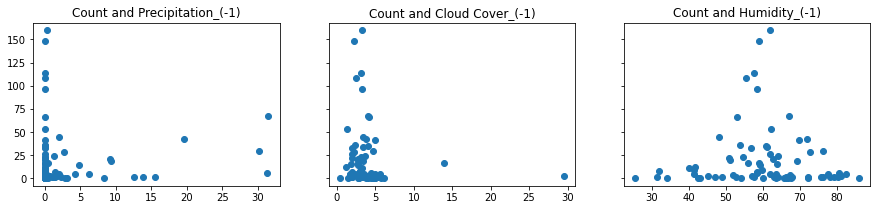

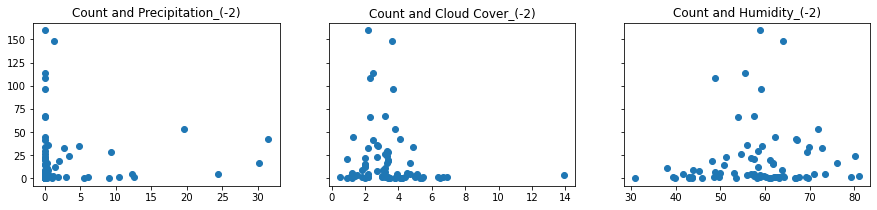

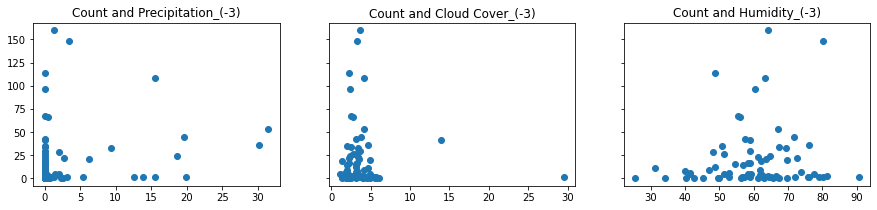

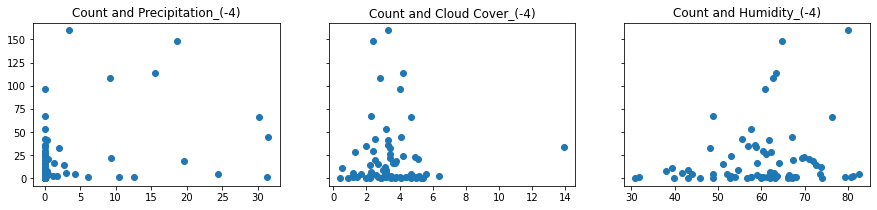

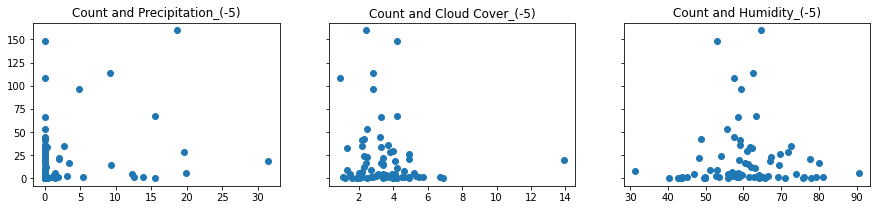

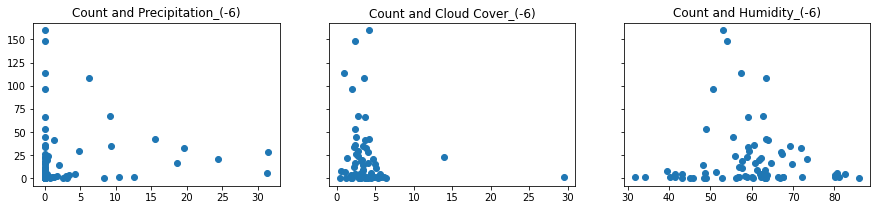

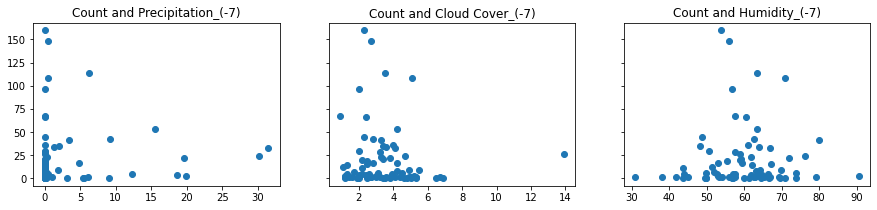

In [153]:
for i in range(length):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
    ax1.scatter(TestDF['Precipitation'+'_(-'+str(i+1)+')'],TestDF[loc])
    ax1.set_title('Count and Precipitation'+'_(-'+str(i+1)+')')
    ax2.scatter(TestDF['Cloud Cover'+'_(-'+str(i+1)+')'],TestDF[loc])
    ax2.set_title('Count and Cloud Cover'+'_(-'+str(i+1)+')')
    ax3.scatter(TestDF['Humidity'+'_(-'+str(i+1)+')'],TestDF[loc])
    ax3.set_title('Count and Humidity'+'_(-'+str(i+1)+')')
    plt.show()

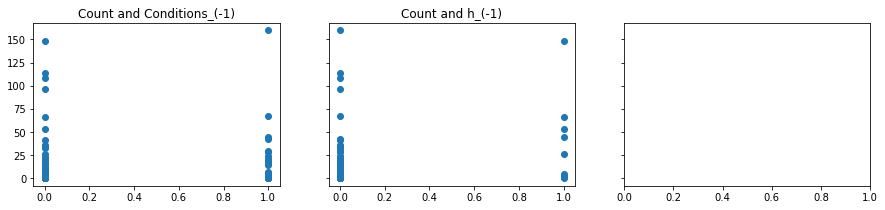

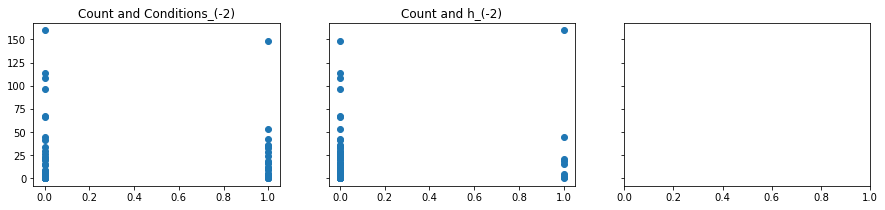

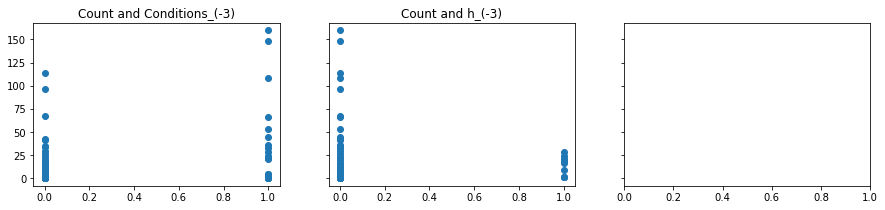

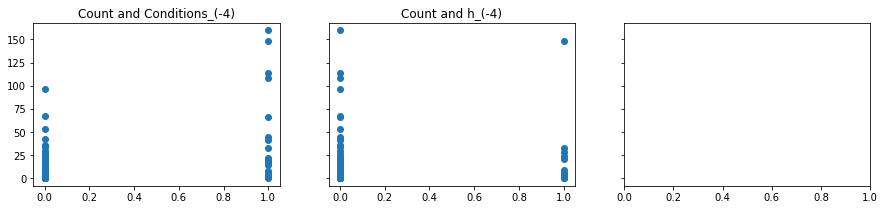

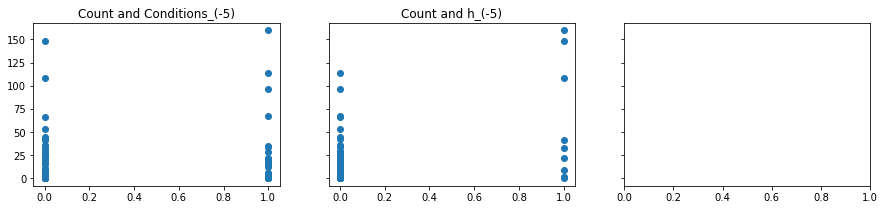

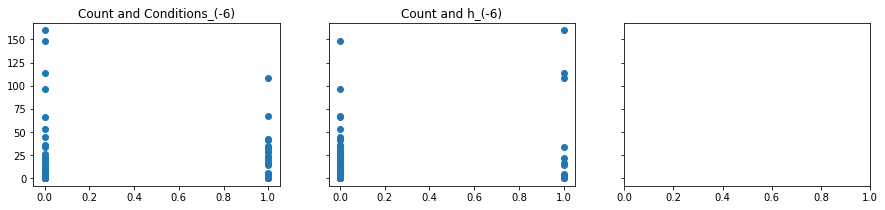

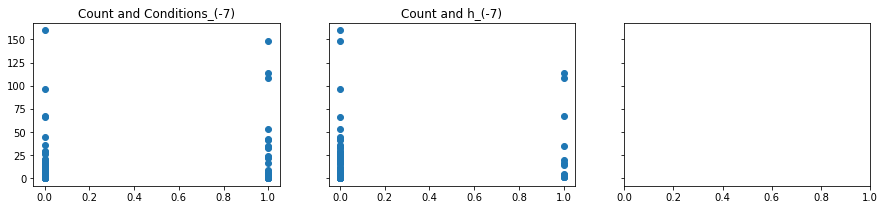

In [154]:
for i in range(length):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
    ax1.scatter(TestDF['Conditions'+'_(-'+str(i+1)+')'],TestDF[loc])
    ax1.set_title('Count and Conditions'+'_(-'+str(i+1)+')')
    ax2.scatter(TestDF[loc+'_h'+'_(-'+str(i+1)+')'],TestDF[loc])
    ax2.set_title('Count and h'+'_(-'+str(i+1)+')')
    plt.show()

In [164]:
TestDF['logcount']=np.log(TestDF[loc]+1)

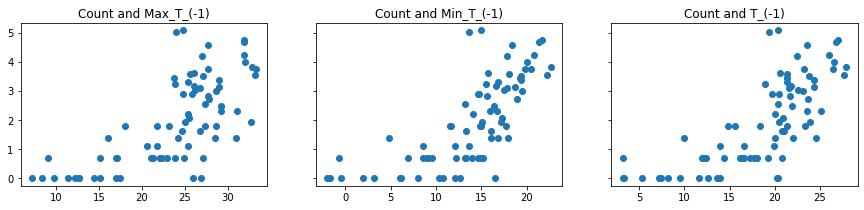

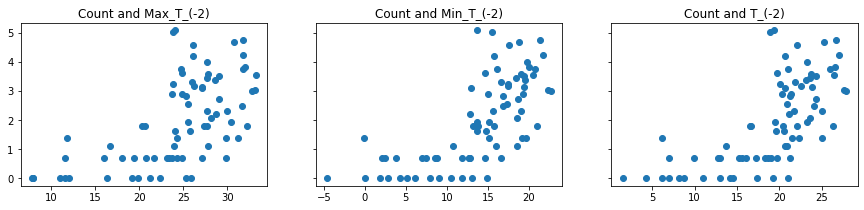

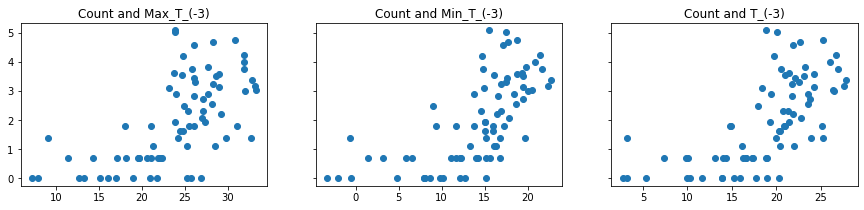

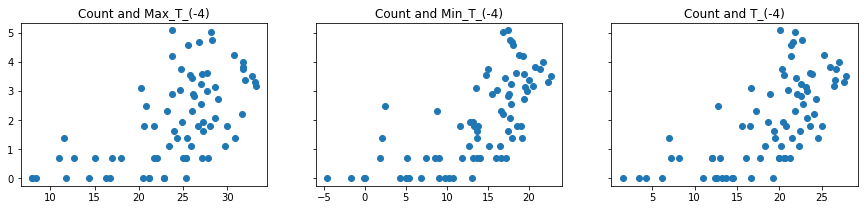

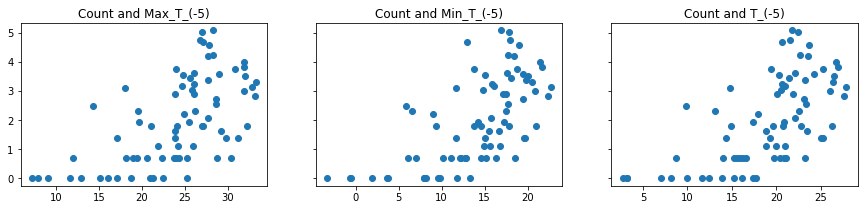

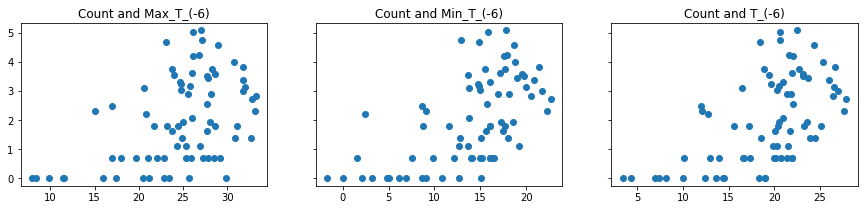

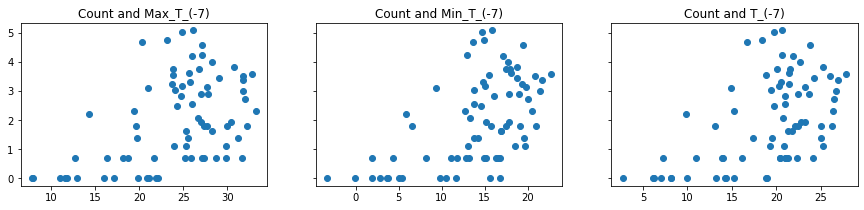

In [155]:
#checking normality
for i in range(length):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
    ax1.scatter(TestDF['Max_T'+'_(-'+str(i+1)+')'],TestDF['logcount'])
    ax1.set_title('Count and Max_T'+'_(-'+str(i+1)+')')
    ax2.scatter(TestDF['Min_T'+'_(-'+str(i+1)+')'],TestDF['logcount'])
    ax2.set_title('Count and Min_T'+'_(-'+str(i+1)+')')
    ax3.scatter(TestDF['T'+'_(-'+str(i+1)+')'],TestDF['logcount'])
    ax3.set_title('Count and T'+'_(-'+str(i+1)+')')
    plt.show()

In [166]:
TestDF.dropna(subset=[loc],inplace=True)
for i in range(length):
    for cols in ['Max_T','Min_T','T','Precipitation', 'Cloud Cover', 'Humidity', 'Conditions', loc+'_h']:
        TestDF.dropna(subset=[cols+'_(-'+str(i+1)+')'],inplace=True)
        TestDF.dropna(subset=[cols],inplace=True)
TestDF.head(40)

,NW1,Max_T,Min_T,T,Precipitation,Cloud Cover,Humidity,Conditions,NW1_h,Max_T_(-1),...,NW1_h_(-6),Max_T_(-7),Min_T_(-7),T_(-7),Precipitation_(-7),Cloud Cover_(-7),Humidity_(-7),Conditions_(-7),NW1_h_(-7),logcount
date,,,,,,,,,,,,,,,,,,,,,
2020-05-08,0.0,7.9,-3.3,2.7,0.20,2.5,49.75,1.0,0.0,8.4,...,0.0,17.1,11.7,14.4,3.19,5.3,57.10,1.0,0.0,0.000000
2020-05-11,0.0,7.9,-4.6,1.5,0.00,0.9,39.91,0.0,0.0,7.2,...,0.0,11.8,-0.1,6.2,0.00,5.0,59.85,0.0,0.0,0.000000
2020-05-13,0.0,7.8,2.8,6.1,5.55,6.5,66.68,1.0,0.0,12.7,...,1.0,11.6,1.9,7.0,0.00,1.2,43.63,0.0,0.0,0.000000
2020-05-15,0.0,12.9,3.7,8.1,0.20,1.9,71.01,1.0,0.0,9.8,...,1.0,7.9,-3.3,2.7,0.20,2.5,49.75,1.0,0.0,0.000000
2020-05-25,2.0,21.7,11.8,16.1,0.00,5.0,62.95,0.0,0.0,20.6,...,0.0,25.3,13.1,19.3,0.00,5.3,30.95,0.0,0.0,1.098612
2020-05-27,1.0,24.3,14.6,19.7,0.00,2.2,43.75,0.0,0.0,21.0,...,0.0,25.9,14.9,21.0,0.00,3.8,53.41,0.0,0.0,0.693147
2020-05-29,1.0,14.3,5.8,9.8,0.00,4.2,63.09,0.0,0.0,17.0,...,0.0,25.2,16.3,20.4,1.06,4.9,62.74,1.0,0.0,0.693147
2020-06-03,11.0,28.7,12.8,21.1,0.00,2.7,45.10,0.0,0.0,29.2,...,0.0,24.3,14.6,19.7,0.00,2.2,43.75,0.0,0.0,2.484907
2020-06-05,8.0,18.1,11.1,14.0,0.00,3.6,65.16,0.0,1.0,25.3,...,0.0,14.3,5.8,9.8,0.00,4.2,63.09,0.0,0.0,2.197225


In [219]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
test_list=['Precipitation', 'Conditions', 'NW1_h']

for i in range(length):
    for cols in ['Min_T','Precipitation', 'Cloud Cover', 'Conditions', loc+'_h']:
        test_list.append(cols+'_(-'+str(i+1)+')')
for i in range(1,length):
    test_list.remove('Min_T'+'_(-'+str(i+1)+')')
for i in [6,5,4,2,0]:
    test_list.remove('Conditions'+'_(-'+str(i+1)+')')
for i in [0]:
    test_list.remove('Cloud Cover'+'_(-'+str(i+1)+')') 
#we declare a variable where we put all features where we want to check for multicollinearity
fs = TestDF[test_list]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(fs.values, i) for i in range(fs.shape[1])]
vif["Features"] = fs.columns
vif
#as a rule of thumb, a vif>10 should be dropped as it may not add to descriptive power of the model because of multicolinearity
#but it's a personal preference , more info at: https://en.wikipedia.org/wiki/Variance_inflation_factor

,VIF,Features
0,5.481839,Precipitation
1,6.494895,Conditions
2,3.389638,NW1_h
3,13.562346,Min_T_(-1)
4,3.862222,Precipitation_(-1)
5,4.745519,NW1_h_(-1)
6,5.319755,Precipitation_(-2)
7,6.985871,Cloud Cover_(-2)
8,4.163693,Conditions_(-2)
9,2.301687,NW1_h_(-2)


In [221]:
# Regression Model
targets = TestDF[loc]


inputs = TestDF[test_list]

#scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [222]:
from sklearn.linear_model import LinearRegression
# scaling the features in a new variable
inputs_scaled = scaler.transform(inputs)
#print(inputs)
#train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state= None)

#linear regression object
reg = LinearRegression()

reg.fit(x_train,y_train)



LinearRegression()

In [223]:
y_hat = reg.predict(x_train)
print(y_train)

date
2020-06-08      1.0
2020-06-03     11.0
2020-05-08      0.0
2020-06-26     21.0
2020-08-11     12.0
2020-07-02     42.0
2020-05-13      0.0
2020-07-10     35.0
2020-06-30    114.0
2020-08-21      3.0
2020-07-31      9.0
2020-06-22      5.0
2020-07-25     41.0
2020-06-19      5.0
2020-07-26     34.0
2020-07-22    160.0
2020-06-10      1.0
2020-07-13     96.0
2020-07-17     66.0
2020-07-20     24.0
2020-07-27     20.0
2020-06-12      1.0
2020-08-12      5.0
2020-05-15      0.0
2020-07-24      4.0
2020-07-28     23.0
2020-06-29    108.0
2020-07-03     53.0
2020-07-09     14.0
2020-08-04      4.0
2020-08-24      3.0
2020-07-29     26.0
2020-09-04      0.0
2020-08-17      1.0
2020-05-27      1.0
Name: NW1, dtype: float64


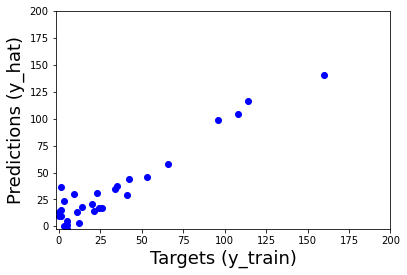

In [224]:
# comparing the targets (y_train) and the predictions (y_hat) by plotting them on a scatter plot
# To see how close we are to the 45-degree line
plt.scatter(y_train, y_hat, c='b')
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(-2,200)
plt.ylim(-2,200)
plt.show()

ValueError: x and y must be the same size

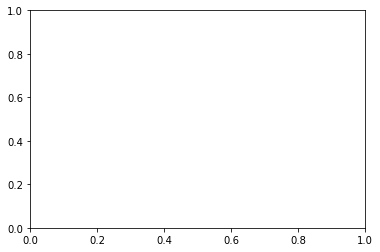

In [200]:
# comparing the targets (y_train) and the predictions (y_hat) by plotting them on a scatter plot
# To see how close we are to the 45-degree line
#plt.scatter(x_train, y_train, c='b')
#plt.scatter(x_train, y_hat, c='r')
#plt.xlabel('Targets (y_train)',size=18)
#plt.ylabel('Predictions (y_hat)',size=18)
#plt.xlim(-2,5)
#plt.ylim(-2,5)
#plt.show()

In [225]:
reg.score(x_train,y_train)

0.9154926206432552

In [101]:
reg.intercept_

1.9058574158078903

In [202]:
reg.coef_

array([ 26.532286  ,  11.07532997, -14.31899942,  12.80684827,
        10.05024017, -10.94030638,   4.92059458,  -1.09219114,
        -0.93012873,  -1.44546479,  -0.77995123,  15.74728175,
         0.20118226,   0.97676395,  -3.8466257 ,  -0.95579282,
        -6.73556555,   6.45610066,   5.93932651,  -1.18442181,
        10.18474872, -12.64370469,  19.15360626,  11.25643838,
       -13.61735805,   1.40148708,   1.14425123])

In [203]:
print(test_list)

['Precipitation', 'Cloud Cover', 'Conditions', 'NW1_h', 'Min_T_(-1)', 'Precipitation_(-1)', 'NW1_h_(-1)', 'Precipitation_(-2)', 'Cloud Cover_(-2)', 'Conditions_(-2)', 'NW1_h_(-2)', 'Precipitation_(-3)', 'Cloud Cover_(-3)', 'NW1_h_(-3)', 'Precipitation_(-4)', 'Cloud Cover_(-4)', 'Conditions_(-4)', 'NW1_h_(-4)', 'Precipitation_(-5)', 'Cloud Cover_(-5)', 'NW1_h_(-5)', 'Precipitation_(-6)', 'Cloud Cover_(-6)', 'NW1_h_(-6)', 'Precipitation_(-7)', 'Cloud Cover_(-7)', 'NW1_h_(-7)']
